In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('test_data.csv')
df.columns=['recency', 'freq', 'monetary', 'months', 'donated']

In [93]:
df.corr()

,recency,freq,monetary,months,donated
recency,1.000000,-0.191899,-0.191456,0.160502,-0.287921
freq,-0.191899,1.000000,0.999241,0.634347,0.217024
monetary,-0.191456,0.999241,1.000000,0.636351,0.219894
months,0.160502,0.634347,0.636351,1.000000,-0.040130
donated,-0.287921,0.217024,0.219894,-0.040130,1.000000


In [94]:
df['monetary']/df['freq']

0      250.0
1      250.0
2      250.0
3      250.0
4      250.0
       ...  
743    250.0
744    250.0
745    250.0
746    250.0
747      NaN
Length: 748, dtype: float64

In [4]:
df_train, df_test = train_test_split(df, random_state=13, test_size=0.3)

In [5]:
feature_list = df_train.columns[:-1]

In [6]:
means = list(df_train[feature_list].mean(axis=0))

In [7]:
for i in range(len(feature_list)):
    f = feature_list[i]
    df_train[f].fillna(means[i], inplace=True)
    df_test[f].fillna(means[i], inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(df_train[feature_list])
X_test = scaler.transform(df_test[feature_list])

In [30]:
y_train = np.array(df_train['donated'])
y_test = np.array(df_test['donated'])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr_clf = LogisticRegression()

In [24]:
lgr_clf.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_test_prob = lgr_clf.predict_proba(X_test)[:, 1]
y_test_pred = lgr_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [42]:
accuracy_score(y_test, y_test_pred)

0.76

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

In [51]:
roc_auc_score(y_test, y_test_pred)

0.5668859649122807

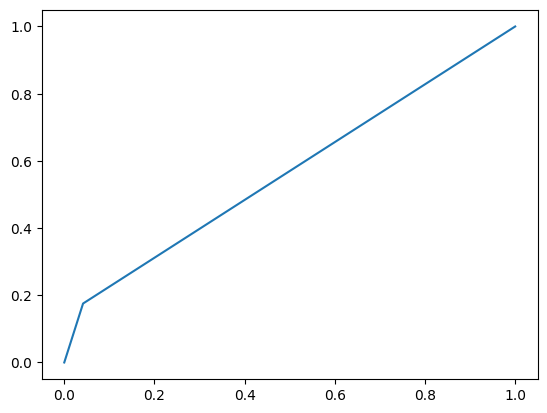

In [54]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [57]:
confusion_matrix(y_test, y_test_pred)

array([[161,   7],
       [ 47,  10]])

In [59]:
y_train.mean()

0.23135755258126195

In [60]:
import xgboost as xgb

In [73]:
params_dict = {'max_depth': 3, 'n_estimators': 100, 'random_state': 42, 'reg_lambda': 1}

In [74]:
xgb_clf = xgb.XGBClassifier(**params_dict)

In [75]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_test_prob = xgb_clf.predict_proba(X_test)[:,1]

In [90]:
y_test_prob = xgb_clf.predict_proba(X_test)[:,1]
y_test_pred = xgb_clf.predict(X_test)

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc_score(y_test, y_test_prob)

0.6915726817042607

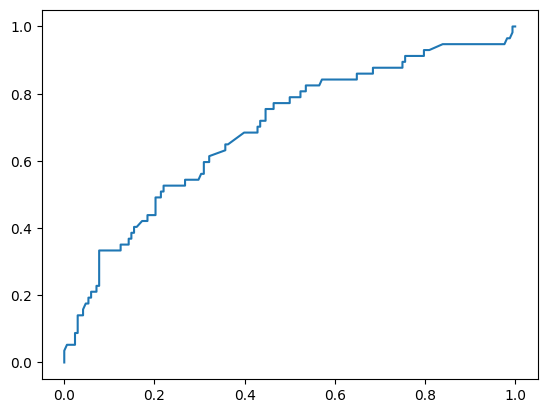

In [89]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [92]:
confusion_matrix(y_test, y_test_pred)

array([[147,  21],
       [ 38,  19]])